Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.signal import find_peaks
import scipy.signal as signal # para sinais usuais em análise de vibrações (ex.: varredura senoidal)
import scipy.fft as fft
import cv2
import glob
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.interpolate import make_interp_spline
import scipy.integrate as integrate
from matplotlib.ticker import ScalarFormatter

Abrindo e organizando dados

In [2]:
#Listas para append
data1 = []
dados = []

#Abrindo dados de uma pasta e organizando-os em uma lista
files = glob.glob ("Peso/*.txt")
for myFile in files:
    data = (myFile)
    data1.append(data)

print(data1)

#Abrindo os txts com pandas e organizando-os em uma lista de dataFrames
for i in range(len(data1)):  
    x = pd.read_csv(data1[i],skiprows = 13, sep = "\t")
    dados.append(x)

#Cortando a área de interesse do gráfico
corte1 = 1527
corte2 = 1570 #nm
for i in range(len(dados)):
    dados[i] = dados[i].iloc[len(np.where(dados[i]["Wavelength (nm)"] < corte1)[0]):-len(np.where(dados[i]["Wavelength (nm)"]>corte2)[0])].reset_index(drop=True)


print(len(dados))

['Peso\\0_1.txt', 'Peso\\0_2.txt', 'Peso\\0_3.txt', 'Peso\\1_1.txt', 'Peso\\1_2.txt', 'Peso\\1_3.txt', 'Peso\\2_1.txt', 'Peso\\2_2.txt', 'Peso\\2_3.txt', 'Peso\\3_1.txt', 'Peso\\3_2.txt', 'Peso\\3_3.txt', 'Peso\\4_1.txt', 'Peso\\4_2.txt', 'Peso\\4_3.txt', 'Peso\\5_1.txt', 'Peso\\5_2.txt', 'Peso\\5_3.txt', 'Peso\\6_1.txt', 'Peso\\6_2.txt', 'Peso\\6_3.txt', 'Peso\\7_1.txt', 'Peso\\7_2.txt', 'Peso\\7_3.txt']
24


Plotando os dados

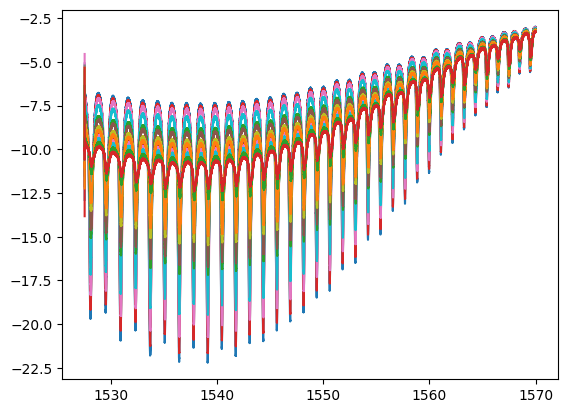

In [3]:
for i in range(len(dados)):
    plt.plot(dados[i]["Wavelength (nm)"],dados[i]["Return Loss (dB)"])
plt.show()

Método da área (Área do envelope dos picos e vales)

Área do envelope superior: -248.88651391342307
Área do envelope inferior: -693.0193199841248
444.1328060707017


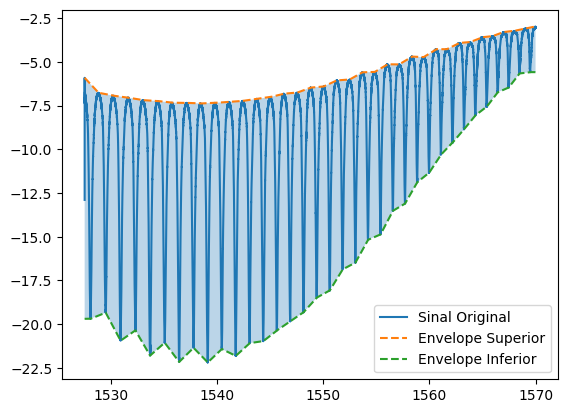

Área do envelope superior: -309.93798112886105
Área do envelope inferior: -507.4960716344665
197.55809050560543


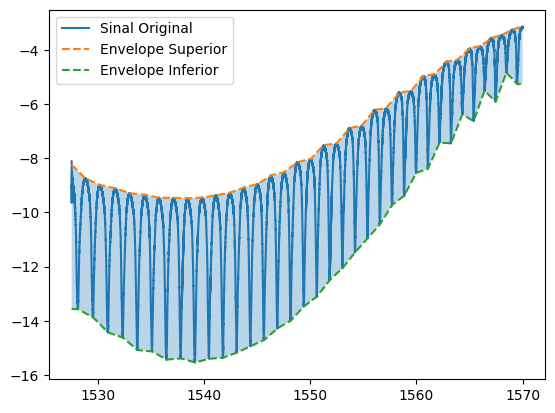

Área do envelope superior: -333.3242768628008
Área do envelope inferior: -439.62546791645445
106.30119105365367


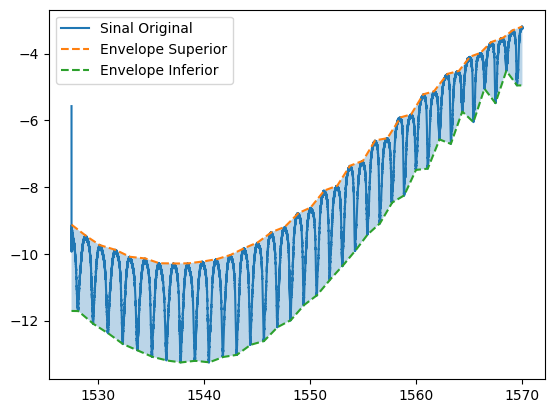

Área do envelope superior: -253.21384974484454
Área do envelope inferior: -677.9187312143845
424.70488146953994


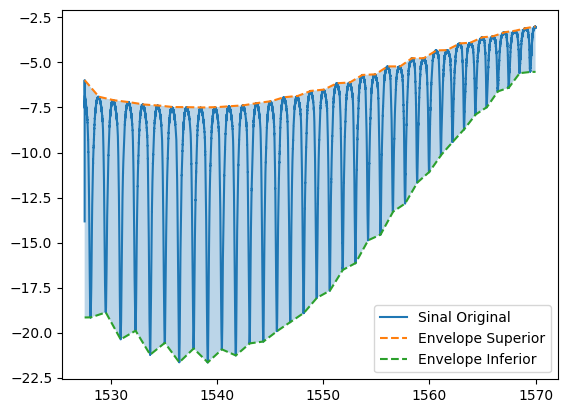

Área do envelope superior: -311.0624151882562
Área do envelope inferior: -500.5053053559679
189.4428901677117


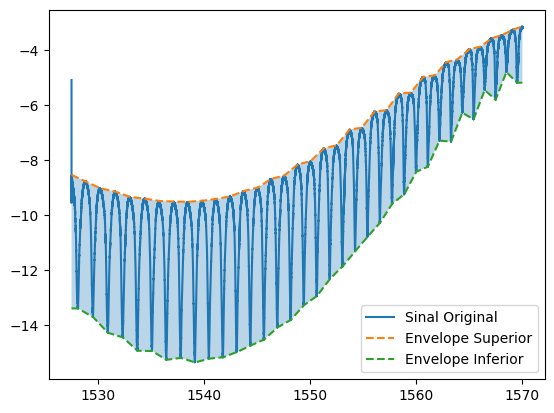

Área do envelope superior: -333.271296342992
Área do envelope inferior: -436.4497586875755
103.17846234458352


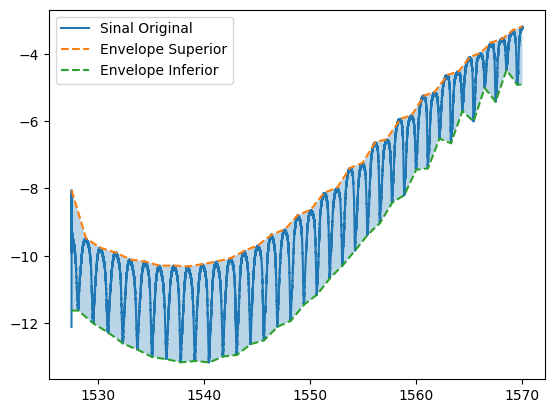

Área do envelope superior: -258.62867543512067
Área do envelope inferior: -650.209602813688
391.5809273785673


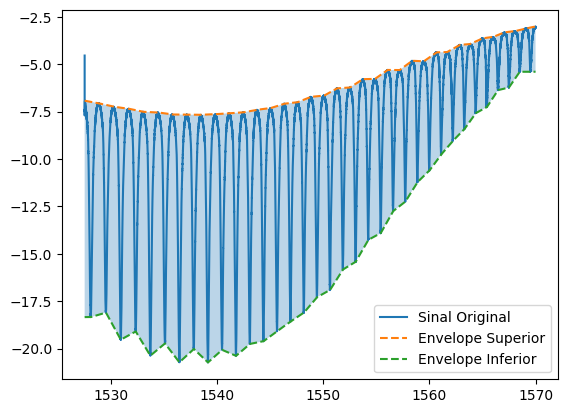

Área do envelope superior: -315.5680476475016
Área do envelope inferior: -479.0832937385927
163.51524609109111


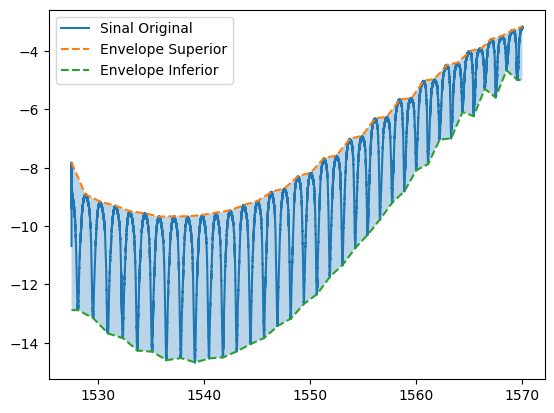

Área do envelope superior: -334.6522758851998
Área do envelope inferior: -433.95997734408644
99.30770145888664


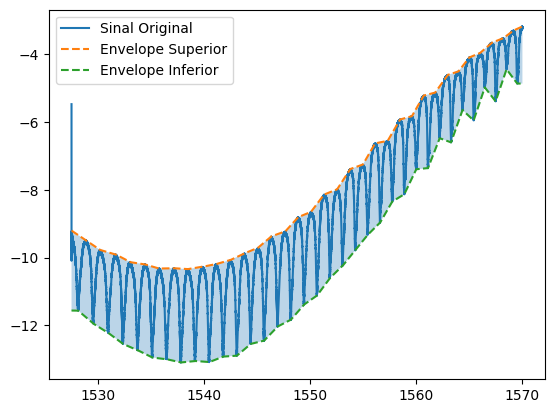

Área do envelope superior: -270.8713980756135
Área do envelope inferior: -615.4428680457662
344.5714699701527


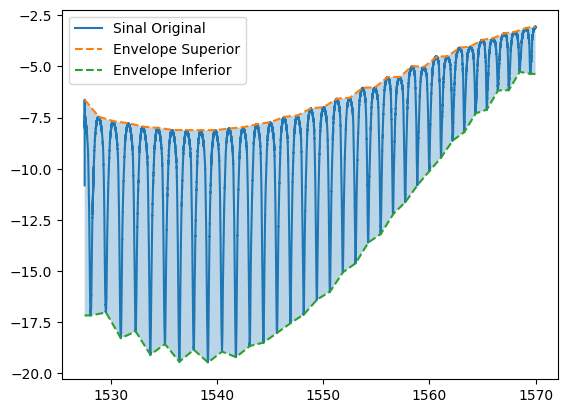

Área do envelope superior: -320.14053866154427
Área do envelope inferior: -466.3604266158416
146.21988795429735


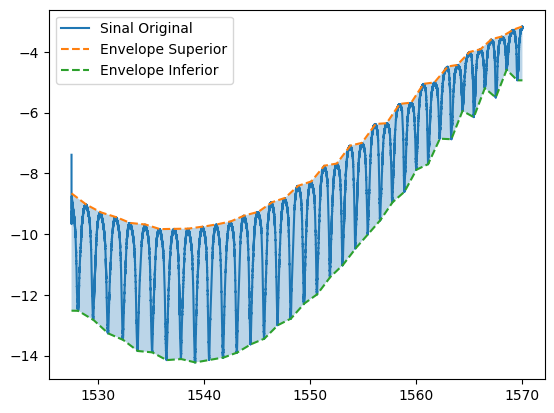

Área do envelope superior: -335.17738555213936
Área do envelope inferior: -430.28774040190694
95.11035484976759


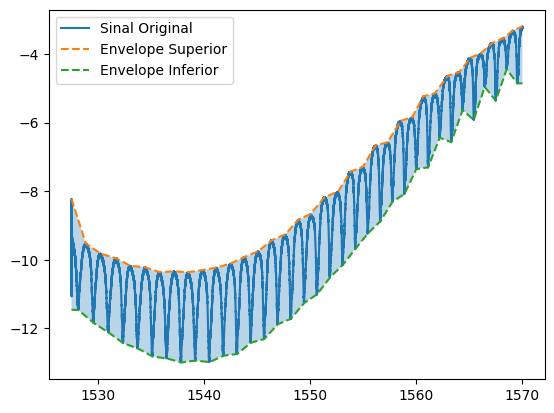

Área do envelope superior: -290.735589609163
Área do envelope inferior: -550.8092495587695
260.07365994960645


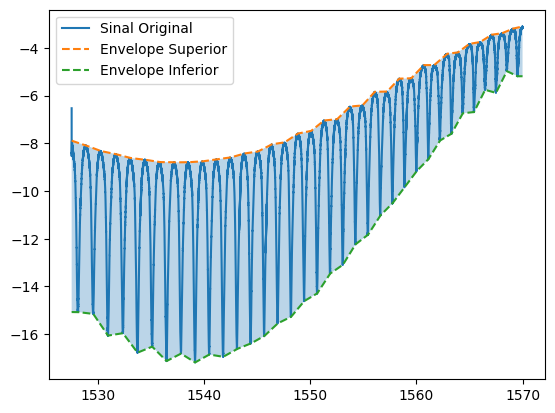

Área do envelope superior: -322.18934745766984
Área do envelope inferior: -460.88021772614195
138.6908702684721


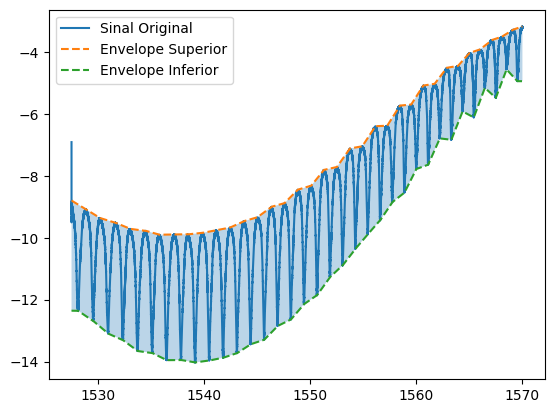

Área do envelope superior: -338.7744729641657
Área do envelope inferior: -422.20181171889203
83.42733875472635


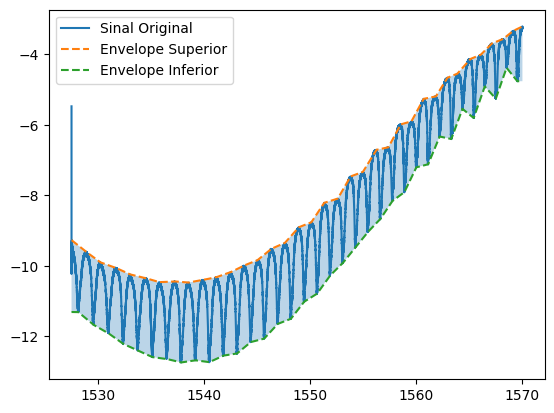

Área do envelope superior: -296.27278908868976
Área do envelope inferior: -538.7926799448849
242.5198908561951


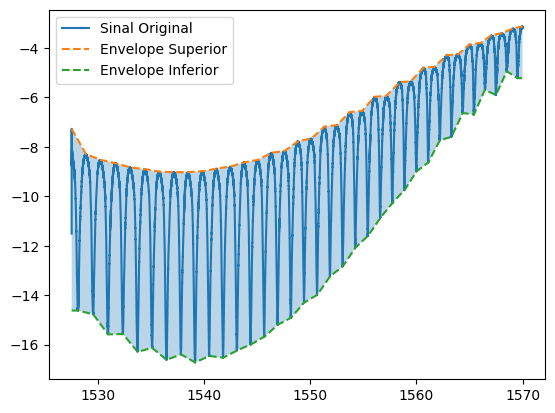

Área do envelope superior: -324.8360192069004
Área do envelope inferior: -455.3463142865088
130.5102950796084


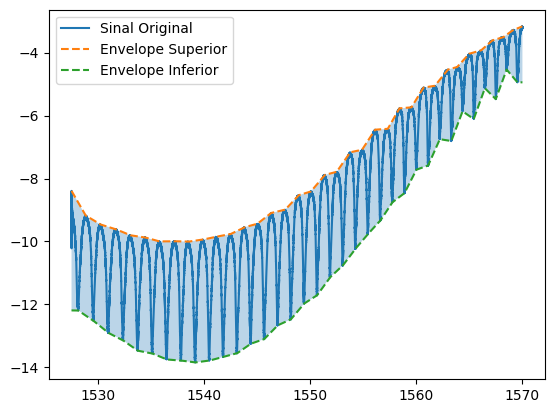

Área do envelope superior: -339.18815633353717
Área do envelope inferior: -421.7993918775472
82.61123554401001


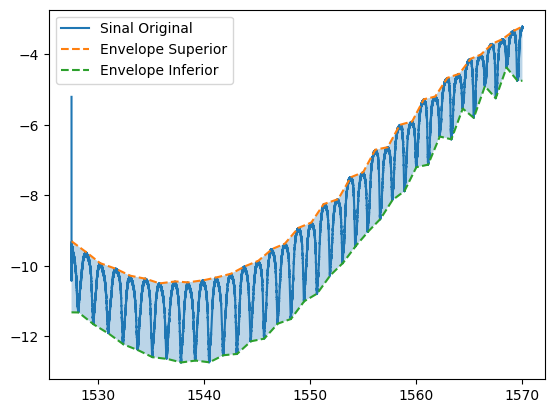

Área do envelope superior: -309.1939644156136
Área do envelope inferior: -503.82605587115364
194.63209145554003


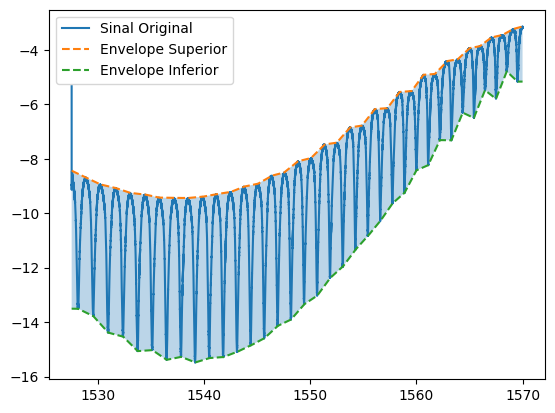

Área do envelope superior: -330.25100760453967
Área do envelope inferior: -442.5384725756416
112.28746497110194


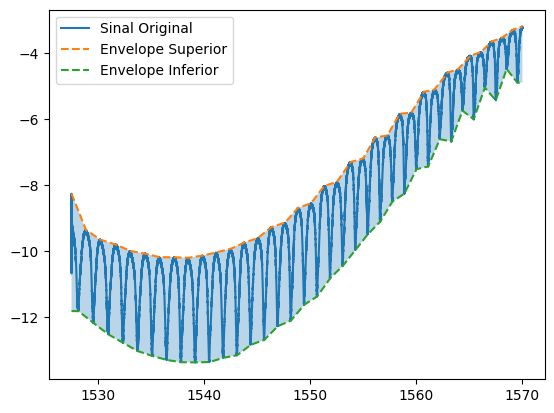

Área do envelope superior: -342.32594570263706
Área do envelope inferior: -415.89511998360194
73.56917428096489


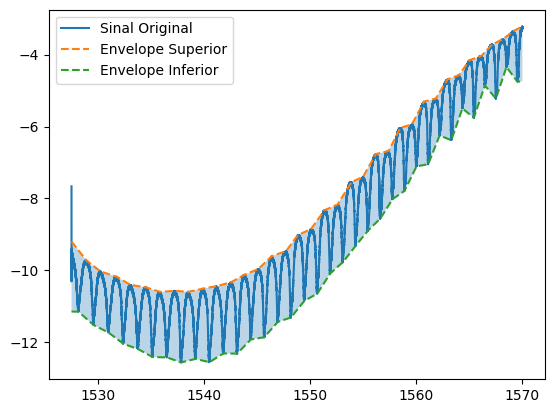

Área do envelope superior: -314.59326940017735
Área do envelope inferior: -488.92535633583236
174.332086935655


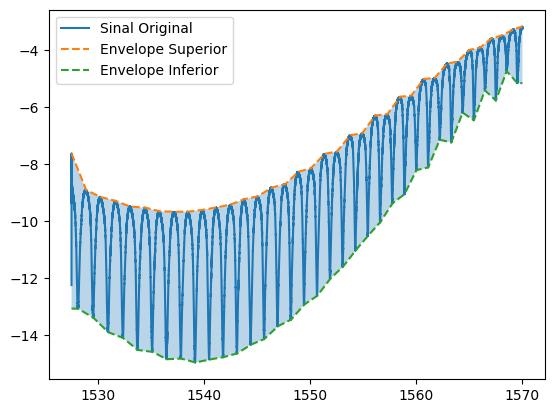

Área do envelope superior: -338.2288772614397
Área do envelope inferior: -428.2595176720916
90.03064041065187


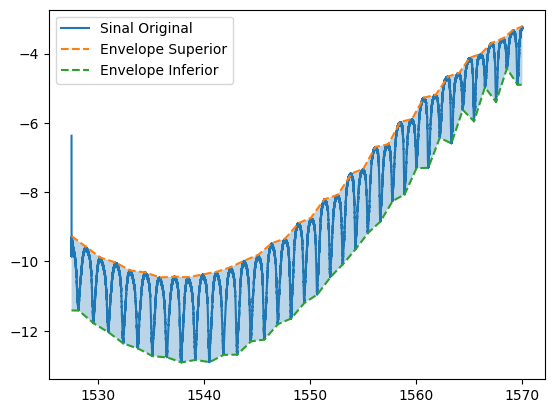

Área do envelope superior: -346.12820539202045
Área do envelope inferior: -410.5721382143091
64.44393282228867


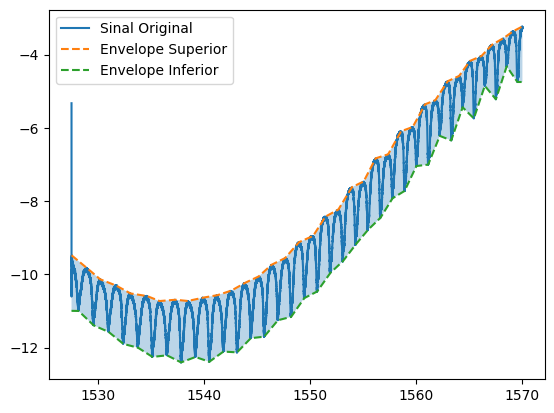

In [4]:
# Mude esse parâmetro para setar a distância mínima x entre picos. Observe os gráficos gerados e veja a aderência dos picos aos seus dados
distancex = 1300

#Array para salvar as áreas do envelope
areas_envelopes = []

# Encontrar os picos (máximos locais) e vales (mínimos locais) para salvar em um array
for i in range(len(dados)):
    picos, _ = signal.find_peaks(dados[i]["Return Loss (dB)"],distance=distancex)
    vales, _ = signal.find_peaks(-dados[i]["Return Loss (dB)"],distance=distancex)

    # Interpolar para criar o envelope superior e inferior
    envelope_superior = np.interp(dados[i]["Wavelength (nm)"], dados[i]["Wavelength (nm)"][picos], dados[i]["Return Loss (dB)"][picos])
    envelope_inferior = np.interp(dados[i]["Wavelength (nm)"], dados[i]["Wavelength (nm)"][vales], dados[i]["Return Loss (dB)"][vales])

    # Calcular a área do envelope superior
    area_envelope_superior  = np.trapz(envelope_superior, dados[i]["Wavelength (nm)"])
    #area_envelope_superior = integrate.simpson(envelope_superior, dados[i]["Wavelength (nm)"])
    # Calcular a área do envelope inferior
    area_envelope_inferior = np.trapz(envelope_inferior, dados[i]["Wavelength (nm)"])
    #area_envelope_inferior = integrate.simpson(envelope_inferior, dados[i]["Wavelength (nm)"])

    # Exibir as áreas dos envelopes
    print(f"Área do envelope superior: {area_envelope_superior}")
    print(f"Área do envelope inferior: {area_envelope_inferior}")
    area_envelope = area_envelope_superior - area_envelope_inferior
    areas_envelopes.append(area_envelope)
    print(area_envelope)

    # Plotar o sinal original e os envelopes
    plt.plot(dados[i]["Wavelength (nm)"], dados[i]["Return Loss (dB)"], label='Sinal Original')
    plt.plot(dados[i]["Wavelength (nm)"], envelope_superior, label='Envelope Superior', linestyle='--')
    plt.plot(dados[i]["Wavelength (nm)"], envelope_inferior, label='Envelope Inferior', linestyle='--')
    plt.fill_between(dados[i]["Wavelength (nm)"], envelope_superior, envelope_inferior, alpha=0.3)
    plt.legend()
    plt.show()

Realizando médias e desvios padrões dos dados

In [5]:
# Usa a função reshape para dividir o array em subconjuntos de 3 elementos
array_reshape = np.reshape(areas_envelopes, (-1, 3))
    
# Calcula a média de cada conjunto de 3 elementos
areas_medias = np.mean(array_reshape, axis=1)
std_medio = np.std(array_reshape, axis=1)

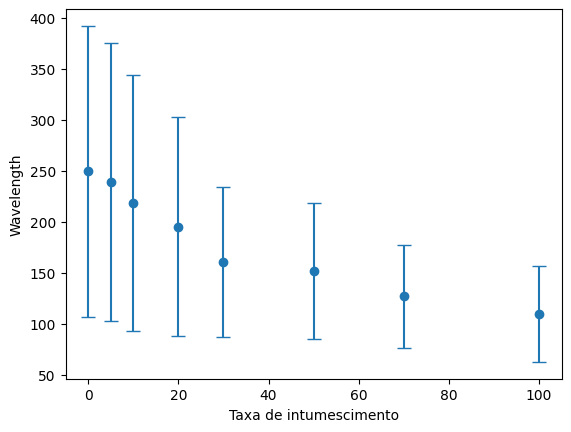

In [6]:
#Definindo o valor real que estava nas condições do sensor em ordem dos dados
Medidas = [0,5,10,20,30,50,70,100] #g

#Dados sem regressão
plt.errorbar(Medidas, areas_medias, yerr=std_medio, fmt='o', capsize=5, label='Dados com desvio padrão')
plt.xlabel("Taxa de intumescimento")
plt.ylabel("Wavelength")
plt.show()

Valor de R^2: {r}


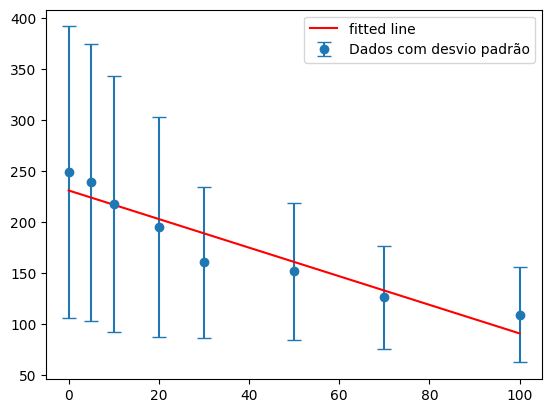

In [7]:
#Salvando dados da regressão linear
slope, intercept, r, p, se = scipy.stats.linregress(Medidas, areas_medias)
print("Valor de R^2: {r}")

#Salvando como arrays
Medidas = np.array(Medidas)
areas_medias = np.array(areas_medias)

#Plotando os dados
plt.errorbar(Medidas, areas_medias, yerr=std_medio, fmt='o', capsize=5, label='Dados com desvio padrão')
plt.plot(Medidas, intercept + slope*Medidas, 'r', label='fitted line')
plt.legend()
plt.show()

Abordagem com wavelength shift

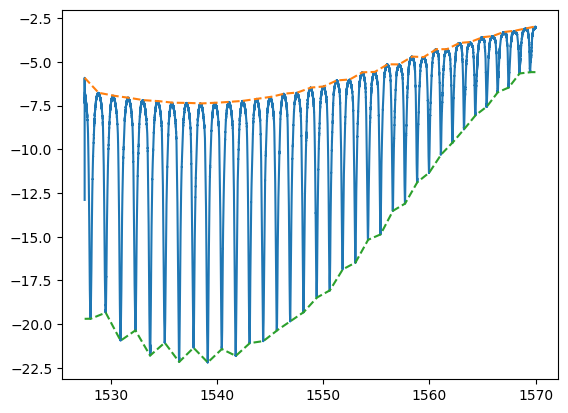

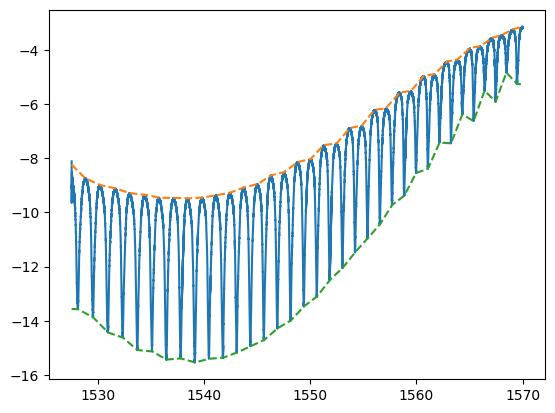

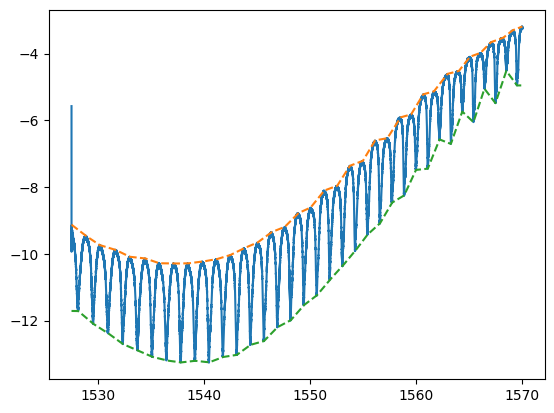

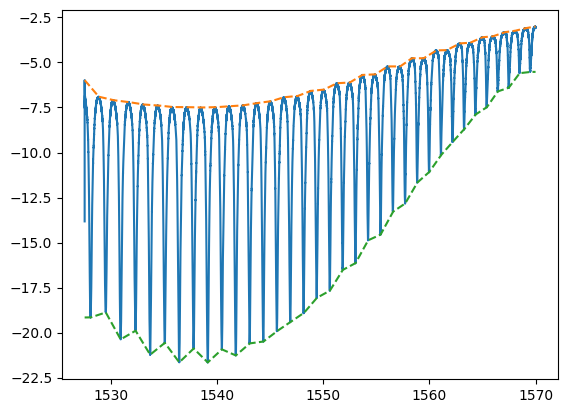

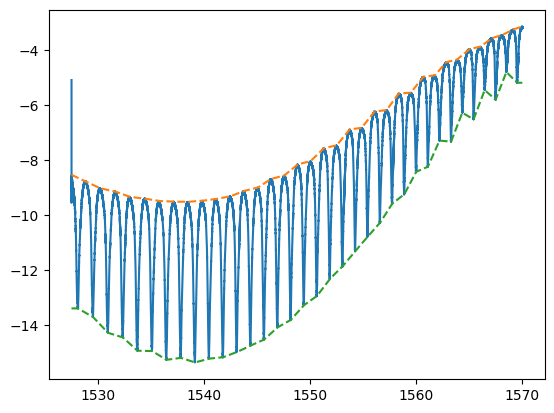

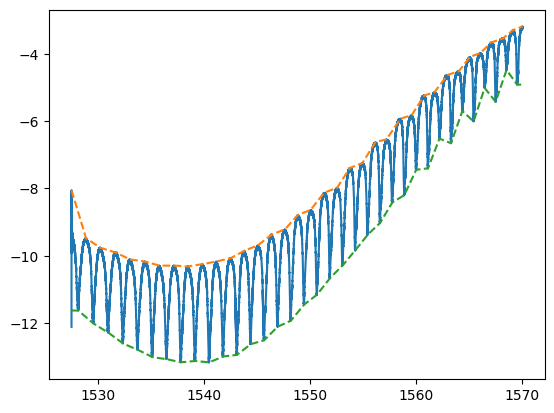

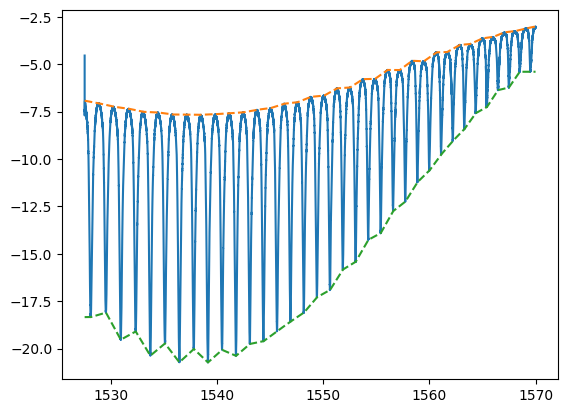

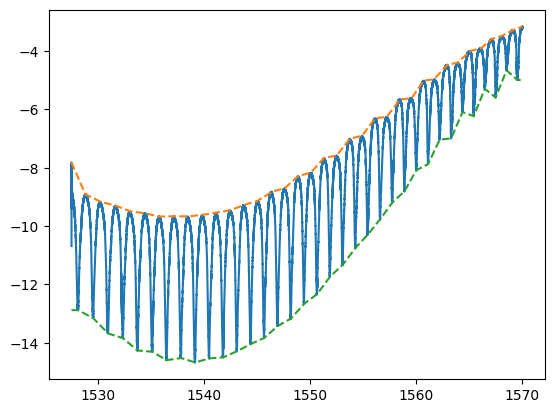

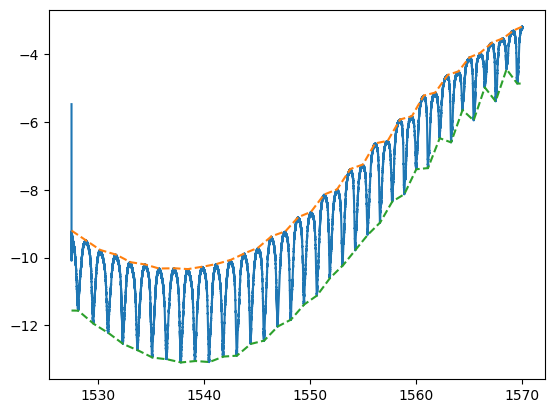

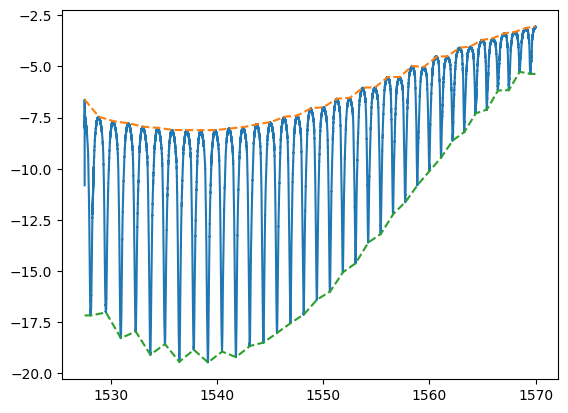

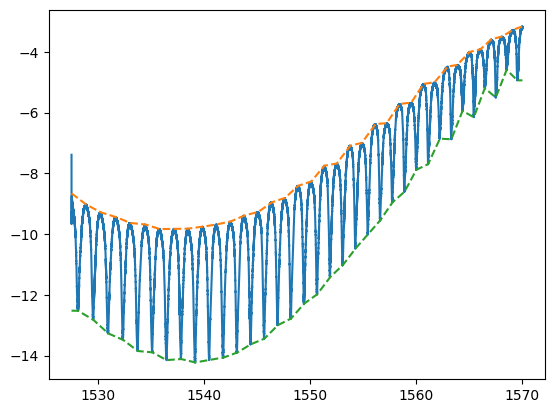

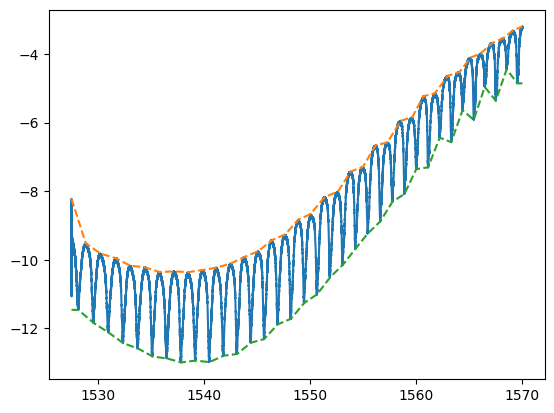

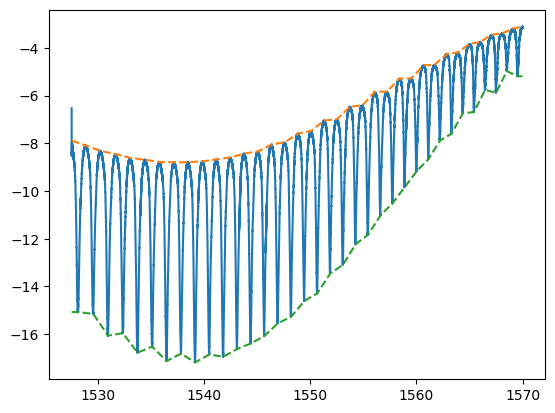

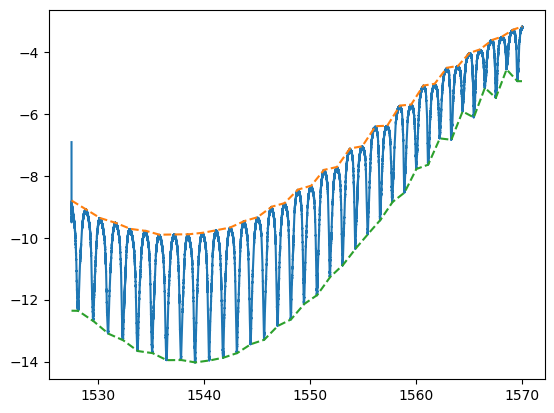

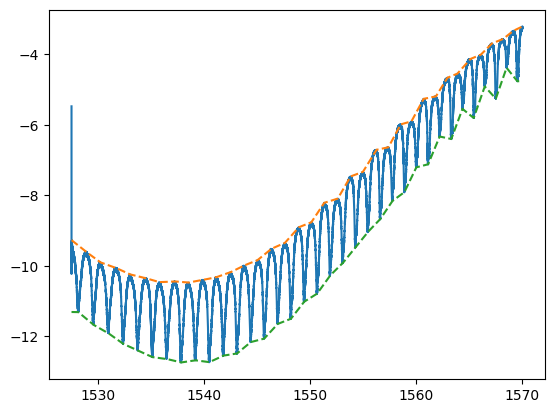

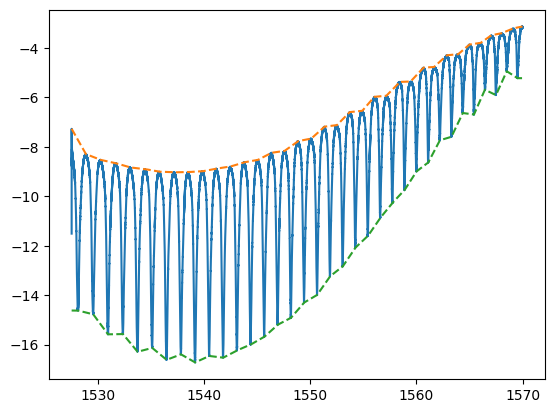

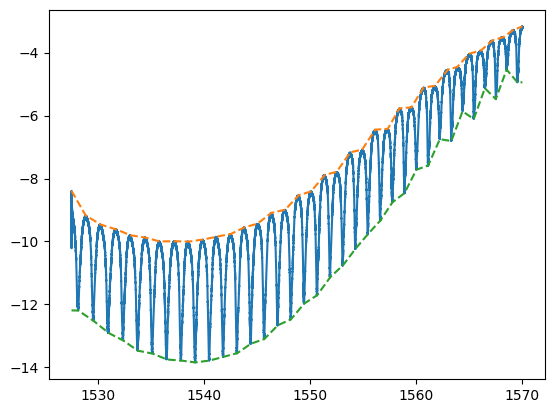

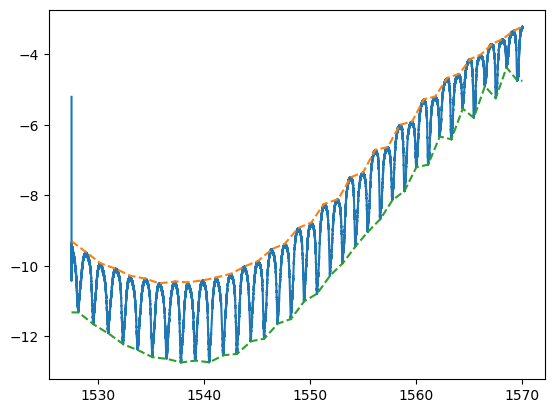

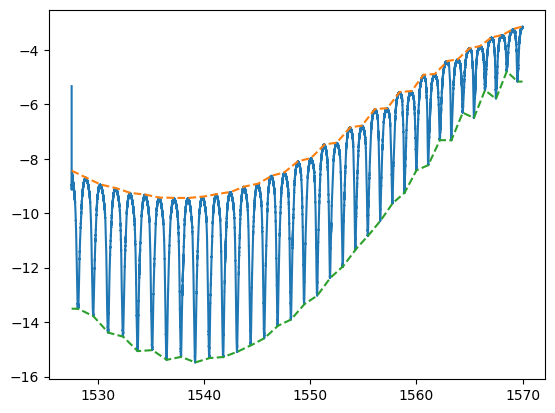

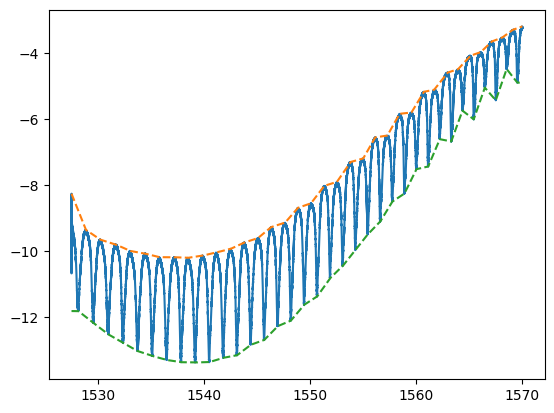

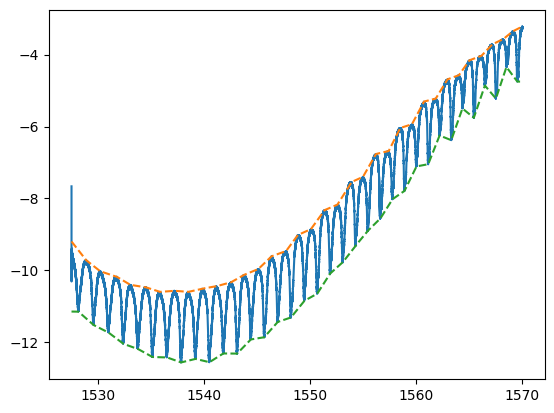

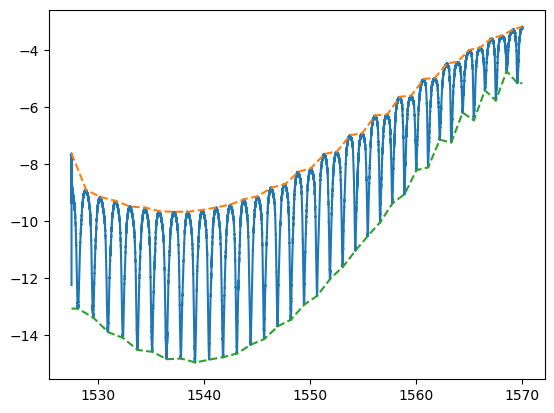

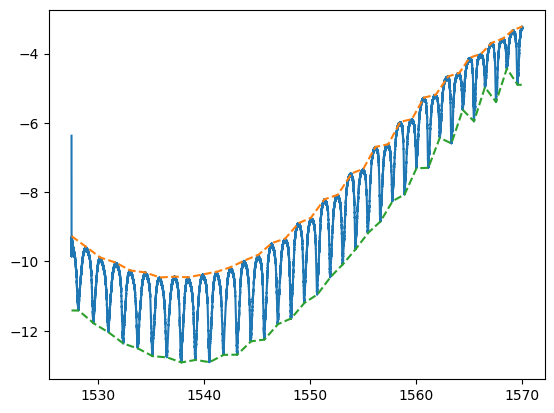

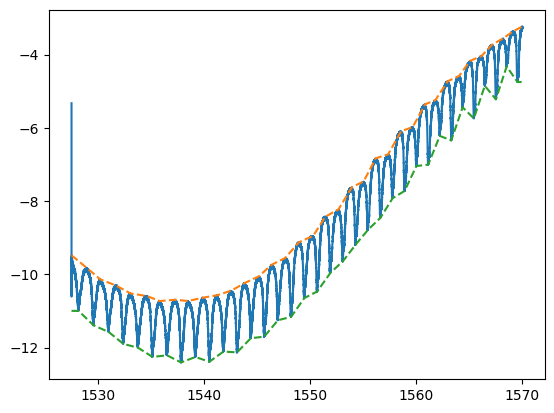

In [8]:
#Criando arrays para serem preenchidos
wavelength_pordado = []
picos = []
vales = []

#Alterar o valor até dar maior aderencia aos dados (Distância mínima em x entre picos)
distancex=1300

#Achando os indices dos picos e os vales para cada dado
for i in range(len(dados)):
    picos.append(signal.find_peaks(dados[i]["Return Loss (dB)"],distance=distancex)[0])
    vales.append(signal.find_peaks(-dados[i]["Return Loss (dB)"],distance=distancex)[0])

    #Organizando um array com a curva do envelope superior e inferior
    envelope_superior = np.interp(dados[i]["Wavelength (nm)"], dados[i]["Wavelength (nm)"][picos[i]], dados[i]["Return Loss (dB)"][picos[i]])
    envelope_inferior = np.interp(dados[i]["Wavelength (nm)"], dados[i]["Wavelength (nm)"][vales[i]], dados[i]["Return Loss (dB)"][vales[i]])

    #Plotando todos os gráficos para observar se o algoritmo está aderindo aos picos
    plt.plot(dados[i]["Wavelength (nm)"], dados[i]["Return Loss (dB)"], label='Sinal Original')
    plt.plot(dados[i]["Wavelength (nm)"], envelope_superior, label='Envelope Superior', linestyle='--')
    plt.plot(dados[i]["Wavelength (nm)"], envelope_inferior, label='Envelope Inferior', linestyle='--')
    plt.show()

Para o código funcionar o número de picos encontrado em cada dado deve ser o mesmo

In [9]:
#Organizando um array com o wavelength correlacionado de cada pico/vale
for i in range(len(dados)):
    wavelength = []
    for j in range(len(picos[i])): #Mude aqui o nome de picos para vales ou de vales para picos
        wavelength.append(dados[i]["Wavelength (nm)"][picos[i][j]]) #Mude aqui o nome de picos para vales ou de vales para picos
    array_salvo = wavelength
    wavelength_pordado.append(array_salvo)

In [10]:
#Conferindo se o número de picos está o mesmo (Caso não esteja, pode ser um corte errado de um dado ou o valor de distancex está aderindo mal aos dados)
for i in range(len(wavelength_pordado)):
    print(len(wavelength_pordado[i]))

36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36


In [11]:
#Função para tirar a média a cada 3 dados e seu desvio padrão
def media_cada_tres_linhas(matriz):
    # Verifica se o número de linhas é múltiplo de 3
    if matriz.shape[0] % 3 != 0:
        raise ValueError("O número de linhas deve ser múltiplo de 3.")
    
    # Agrupa as linhas em conjuntos de 3 e calcula a média
    # Reshape para agrupar as linhas a cada 3
    reshaped = matriz.reshape(-1, 3, matriz.shape[1])
    
    # Calcula a média ao longo da dimensão das 3 linhas
    medias = reshaped.mean(axis=1)
    standard = reshaped.std(axis=1)
    
    return medias,standard

#Chamada da função e salva do resultado em um novo array
wavelength_pordado = np.array(wavelength_pordado)
wavelength_medio, desvios_padrao = media_cada_tres_linhas(wavelength_pordado)

Realizando uma regressão linear para cada pico e salvando os dados

In [12]:
#Criando um array vazio para ser preenchido
resultados = []

# Verifica quantas linhas existem
num_colunas = wavelength_medio.shape[1]
print(num_colunas)

# Loop para fazer regressão linear para cada linha
for i in range(num_colunas):
    # Seleciona a i-ésima linha das médias e dos desvios padrão
    x = wavelength_medio[:, i]  # Linha i de medias (valores de todas as colunas)

    # Faz a regressão linear para a linha atual
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Medidas, x)
    
    #Salva os dados de inclinação, intercessão com o eixoy, valor de R^2, valor de P e desvio padrão
    resultados.append([slope,intercept,r_value,p_value,std_err])

36


Essa parte do código tem a função de pegar cada regressão realizada e filtrar a que estão acima do parâmetro que você definir. Logo após isso, o código seleciona a regressão que tem o valor de inclinação maior, de forma a dar o pico mais sensível ao parâmetro medido. Observe a mensagem de nenhum valor caso ela seja o resultado.

In [13]:
#Valor de R^2 para filtrar
R_desejado = 0.95

# Matriz criada por resultados
matriz = np.array(resultados)  # Matriz 5x6 de exemplo, com valores entre -1 e 1

# Etapa 1: Selecione a terceira linha (R^2) e identifique os valores dentro do limite definido
terceira_coluna = matriz[:, 2]  # Seleciona a terceira linha
colunas_criticas = np.where((terceira_coluna > R_desejado) | (terceira_coluna < -R_desejado))[0]  # Índices das colunas

# Etapa 2: Verifique se há valores que satisfaçam a condição
if len(colunas_criticas) > 0:
    # Etapa 3: Selecione os valores da primeira linha nessas colunas (Inclinação da reta)
    valores_primeira_coluna = matriz[colunas_criticas, 0]

    # Etapa 4: Encontre o maior valor absoluto na primeira linha
    maior_valor = np.max(np.abs(valores_primeira_coluna))

    # Etapa 5: Encontre o índice da coluna correspondente ao maior valor
    indice_maior_valor = colunas_criticas[np.argmax(np.abs(valores_primeira_coluna))]

    # Exibir os resultados
    print(f"Colunas que passaram do filtro de R :{colunas_criticas}")
    print(f"Maior valor na primeira linha entre essas colunas (Sensibilidade do sensor): {maior_valor}")
    print(f"Índice da coluna do maior valor de sensibilidade: {indice_maior_valor}")
else:
    print("Nenhum valor maior que o estipulado foi encontrado como R^2")

Colunas que passaram do filtro de R :[18 20 21 29]
Maior valor na primeira linha entre essas colunas (Sensibilidade do sensor): 0.001470070150150793
Índice da coluna do maior valor de sensibilidade: 20


Plotando o gráfico final obtido do código

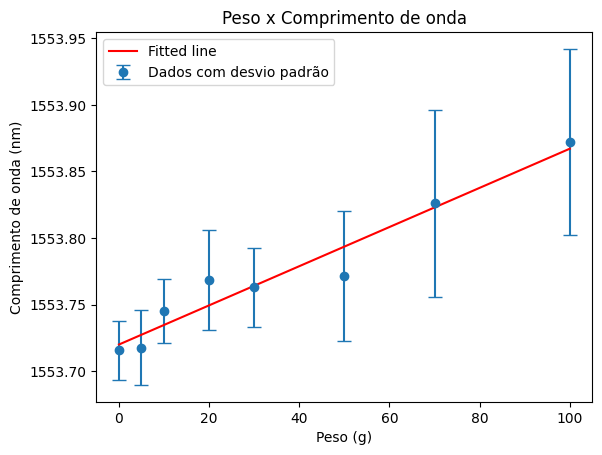

In [14]:
plt.errorbar(Medidas, wavelength_medio[:,indice_maior_valor], yerr=desvios_padrao[:,indice_maior_valor], fmt='o', capsize=5, label='Dados com desvio padrão')
plt.plot(Medidas, resultados[indice_maior_valor][1] + resultados[indice_maior_valor][0]*np.array(Medidas), 'r', label='Fitted line')
plt.ticklabel_format(useOffset=False)
plt.title("Peso x Comprimento de onda")
plt.xlabel("Peso (g)")
plt.ylabel("Comprimento de onda (nm)")
plt.legend() 
plt.show()